<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe BucketSort**

## **1. Problema: Ordenamiento de una secuencia de números**
>Dado un arreglo $n$ de números mayores o iguales a 0 y menores a 1, genere una permutación de la secuencia lógica, tal que los elementos del arreglo queden ordenados de menor a mayor.

**Entrada**: Secuencia de $n$ números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia, tal que $a_1'\leq a_2' \leq... \leq a_n'$.

## **2. BucketSort**

### **2.1. Descripción del algoritmo**
El Bucket es un algoritmo de ordenamiento que se basa en particionar en rangos los elementos de un arreglo para ordenar cada rango por separado y disminuir de esta forma la complejidad total del algoritmo, es decir, si conocemos el límite inferior y el límite superior de nuestros datos podremos crear n rangos de igual extensión y hacer uso de una función de ordenamiento comparativa como lo es InsertionSort, que en datos uniformemente distribuidos es poco probable que por cada uno de los rangos se supere el orden O(n), incluso podremos analizar que el algoritmo Insertion Sort tiene un tiempo de ejecución en el caso promedio de O(k^2) con k el número de total de elementos entregados al algoritmo siendo $<n$ y se iterará esa función por la cantidad de buckets $m < n$, por lo que el algoritmo podrá seguir teniendo una complejidad menor a uno comparativo de O(n^2).

La implementación llevada a cabo para BucketSort es una variante que funciona solo para números positivos $≥ 0$ $y$ $<1$, este particiona el arreglo en 10 compartimientos con intérvalos de una décima cada uno, como por ejemplo el rango de $0.5$ a $0.6$. Luego en cada compartimento se hace uso de la función InsertionSort para ordenarlos y finalmente se concatenan los resultados o bien se recorre cada bucket para obtener los elementos de ordenados de menor a mayor rango (Se utilizará esta segunda forma).

InsertionSort funcionará de la siguiente manera, recibirá como entrada un arreglo de $n$ elementos que serán ordenados dentro del mismo.
1.   En cada iteración se obtendrá una **key** que será el elemento $a[ i ]$, donde i comenzará en $1$ hasta $n-1$ (Se considera que el sub-conjunto de un solo elemento $a[ 0 ]$ se encuentra ordenado).
2.   La **key** se compara con cada elemento $a[ k ]$ donde $k$ comenzará siendo igual a $i-1$ hasta $0$ (Todo elemento anterior a **key**).
3.   Si el elemento $a[ k ]$ es menor a **key** se le asigna la **key** a $a[ k+1 ]$, ya que es la posición en la que pertenece. Si no es verdad, se copiará el elemento $a[ k ]$ en $[ k+1 ]$ (Simula que el elemento se mueve un espacio a la derecha) y se repetirá este paso con $k$ igual a $k-1$.
4.   Al finalizar el algoritmo se retornará el arreglo ordenado.


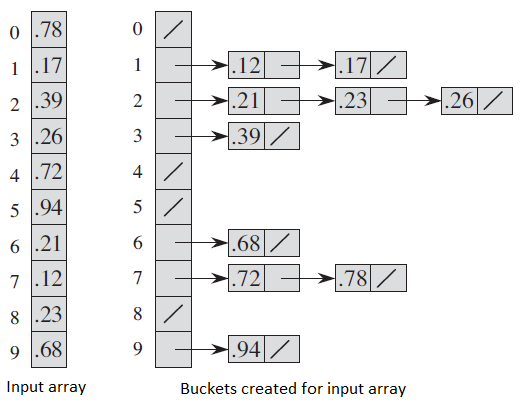

Imagen obtenida del texto guía, página 201.

### **2.2. Implementación del algoritmo**

In [19]:
import random
from termcolor import colored
import copy

In [18]:
#Función InsertioSort
def insertionSort(a, T = 0, verbose = False):
    n = len(a)
    if verbose and n>0:
      print("Antes de comenzar")
      if(n == 1):
        print(colored(f"{str(a[:1])[1:-1]}", "green"))
      else:
        print(colored(f"{str(a[:1])[1:-1]}", "green"), ",", str(a[1:])[1:-1])

    for i in range(1,n): #Comienzo de cada iteración de i, bucle mayor
      key = a[i]
      if verbose:
        print("\nIteración",i)
        if i == n-1:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), end= '')
        else:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), ",", str(a[i+1:])[1:-1], end= '')
        print("   key:", colored(f"{key}", "red"))
        print("Comparaciones")

      for k in range(i-1,-1,-1):#Inicio de las comparaciones
        T += 1
        if a[k] < key: #Si es verdad
          a[k+1] = key    #key toma el lugar que le corresponde, a la derecha del elemento actual
          if verbose:
            print(str(a[:k+1])[1:-1], ",", colored(f"{str(a[k+1:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", colored(f"{key}", "blue"))

          break           #En este caso se rompe este ciclo para ubicar otro key

        a[k+1] = a[k]  #Si es falso, el elemento de la mano ordenada se "mueve a la derecha"(se copia)
        if verbose:
          if k == 0:
            print(colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)
          else:
            print(str(a[:k])[1:-1], ",", colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)

      if key < a[0]:   #Si se movieron a la derecha todos los elementos porque key era el más pequeño
        a[0] = key     #Entonces se concluye este ciclo colocándo a la key en la primer posición

        if verbose:
            print("La key era el menor de todos los números\nUbicándola al principio")
            print(colored(f"{str(a[0:1])[1:-1]}", "red"), ",", str(a[1:])[1:-1], "   key:", colored(f"{key}", "red"))
      if verbose:
        print("Al finalizar iteración")
        if i != n-1:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"), ",", str(a[i+1:])[1:-1])
        else:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"))

    if verbose:
      print("\nSub arreglo ordenado!")
      print(str(a[:]), "\n")
    return a, T

In [42]:
#Función BucketSort
def bucketSort(A, cont = 0, verbose = False):
    bucket = []
    cant_buckets = 10 

    if verbose:
        print("Arreglo de entrada:" , A, "\n")
        
    #Ciclo que crea cada bucket
    for i in range(cant_buckets):
        bucket.append([])

    if verbose:
      print("Creando cada bucket")
      for i in range(cant_buckets):
        print("Bucket de rango:", 0 + float(i)/10, "a", 0 + float(i+1)/10)
        print(bucket[i])

    #Ciclo que clasifica cada número para introducirse a su bucket correspondiente
    for j in A:
        index_b = int(cant_buckets * j) #Ejemplo j = 0.55, se multiplica por 10 y se trunca,
        bucket[index_b].append(j)   #entonces se introduce en el bucket de índice 5

    if verbose:
      print("\nAgregando cada elemento en su bucket correspondiente")
      for i in range(cant_buckets):
        print("Bucket de rango:", 0 + float(i)/10, "a", 0 + float(i+1)/10)
        print(bucket[i])
      print("\n" + str(cant_buckets), "llamadas a InsertionSort:")

    for i in range(cant_buckets):
      if verbose:
        print("Rango de números a ordenar:", 0 + float(i)/10, "a", 0 + float(i+1)/10)
        #Ordena cada bucket por separado con la función InsertionSort
      bucket[i], cont = insertionSort(bucket[i], cont, verbose)

    if verbose:
      print("Buckets ordenados:")
      for i in range(cant_buckets):
        print("Bucket de rango:", 0 + float(i)/10, "a", 0 + float(i+1)/10)
        print(bucket[i])
      print("\nObteniendo todos los elementos de los buckets en orden, desde")
      print("los menores rangos a los mayores, copiándolos en el arreglo original.")
    #Reemplaza cada elemento del arreglo original por los buckets ordenados por rangos de menor a mayor       
    k = 0
    for i in range(cant_buckets):
        for j in range(len(bucket[i])):
            A[k] = bucket[i][j]
            k += 1

    return A, cont #Retorna el arreglo ordenado y el contador total de comparaciones realizadas por insertionSort


In [21]:
A = [0.647 , 0.854 , 0.256 , 0.071 , 0.133 , 0.888 , 0.544 , 0.619 , 0.845 , 0.79] 
A, cont = bucketSort(A)
print("Arreglo final ordenado:", A)
print("Número de comparaciones realizadas por InsertionSort:", cont)

Arreglo final ordenado: [0.071, 0.133, 0.256, 0.544, 0.619, 0.647, 0.79, 0.845, 0.854, 0.888]
Número de comparaciones realizadas por InsertionSort: 4


### **2.3. Ejemplo**
Considerando el arreglo:

$A = [0.647 , 0.854 , 0.256 , 0.071 , 0.133 , 0.888 , 0.544 , 0.619 , 0.845 , 0.79] $ 

1.- Se crearán 10 buckets vacíos para clasificar cada elemento del arreglo en intérvalos de rangos de 1 décima (cada bucket contiene una lista dentro):

$bucket[0] = []$ rangos del $0.0$ al $0.1$ sin considerarlo.

$bucket[1] = []$ rangos del $0.1$ al $0.2$ sin considerarlo.

$bucket[2] = []$ rangos del $0.2$ al $0.3$ sin considerarlo.

$bucket[3] = []$ rangos del $0.3$ al $0.4$ sin considerarlo.

$bucket[4] = []$ rangos del $0.4$ al $0.5$ sin considerarlo.

$bucket[5] = []$ rangos del $0.5$ al $0.6$ sin considerarlo.

$bucket[6] = []$ rangos del $0.6$ al $0.7$ sin considerarlo.

$bucket[7] = []$ rangos del $0.7$ al $0.8$ sin considerarlo.

$bucket[8] = []$ rangos del $0.8$ al $0.9$ sin considerarlo.

$bucket[9] = []$ rangos del $0.9$ al $1.0$ sin considerarlo.

2.- Se agregará cada bucket a su casilla correspondiente.

Se ejemplificará lo que sucede con los 3 primeros elementos, porque el proceso es siempre el mismo.

2.1.- $A[0] = 0.647$ Se obtiene el primer elemento de $A$.

Se obtiene el índice del bucket multiplicando el elemento por 10 y luego truncándolo.

$índice = truncar(0.647 * 10) = truncar(6.47) = 6$

$bucket[indice] = A[0]$ Finalmente el elemento se añade a la lista del bucket.

2.2.- $A[1] = 0.854$ Se obtiene el primer elemento de $A$.

Se obtiene el índice del bucket multiplicando el elemento por 10 y luego truncándolo.

$índice = truncar(0.854 * 10) = truncar(8.54) = 8$

$bucket[indice] = A[1]$ Finalmente el elemento se añade a la lista del bucket.

2.3.- $A[2] = 0.256$ Se obtiene el primer elemento de $A$.

Se obtiene el índice del bucket multiplicando el elemento por 10 y luego truncándolo.

$índice = truncar(0.256 * 10) = truncar(2.56) = 2$

$bucket[indice] = A[2]$ Finalmente el elemento se añade a la lista del bucket.

Se repite con cada elemento y el resultado queda de esta forma:

$bucket[0] = [0.071]$ rangos del $0.0$ al $0.1$ sin considerarlo.

$bucket[1] = [0.133]$ rangos del $0.1$ al $0.2$ sin considerarlo.

$bucket[2] = [0.256]$ rangos del $0.2$ al $0.3$ sin considerarlo.

$bucket[3] = []$ rangos del $0.3$ al $0.4$ sin considerarlo.

$bucket[4] = []$ rangos del $0.4$ al $0.5$ sin considerarlo.

$bucket[5] = [0.544]$ rangos del $0.5$ al $0.6$ sin considerarlo.

$bucket[6] = [0.647, 0.619]$ rangos del $0.6$ al $0.7$ sin considerarlo.

$bucket[7] = [0.79]$ rangos del $0.7$ al $0.8$ sin considerarlo.

$bucket[8] = [0.854, 0.888, 0.845]$ rangos del $0.8$ al $0.9$ sin considerarlo.

$bucket[9] = []$ rangos del $0.9$ al $1.0$ sin considerarlo.

3.- Sin profundizar en InsertionSort en vista de que en su momento se explicó con detalle su procedimiento, se realizarán 10 llamadas a al InsertionSort, una por cada lista de $bucket$ para ordenarlas individualmente. El resultado queda de esta forma:

$bucket[0] = [0.071]$ rangos del $0.0$ al $0.1$ sin considerarlo.

$bucket[1] = [0.133]$ rangos del $0.1$ al $0.2$ sin considerarlo.

$bucket[2] = [0.256]$ rangos del $0.2$ al $0.3$ sin considerarlo.

$bucket[3] = []$ rangos del $0.3$ al $0.4$ sin considerarlo.

$bucket[4] = []$ rangos del $0.4$ al $0.5$ sin considerarlo.

$bucket[5] = [0.544]$ rangos del $0.5$ al $0.6$ sin considerarlo.

$bucket[6] = [0.619, 0.647]$ rangos del $0.6$ al $0.7$ sin considerarlo.

$bucket[7] = [0.79]$ rangos del $0.7$ al $0.8$ sin considerarlo.

$bucket[8] = [ 0.845, 0.854, 0.888]$ rangos del $0.8$ al $0.9$ sin considerarlo.

$bucket[9] = []$ rangos del $0.9$ al $1.0$ sin considerarlo.

4.- Y finalmente se obtienen todos los elementos de los buckets en orden, desde los menores rangos a los mayores, copiándolos en el arreglo original.

**Resultado:** $A = [0.071, 0.133, 0.256, 0.544, 0.619, 0.647, 0.79, 0.845, 0.854, 0.888]$

Y ya conseguimos el arreglo ordenado.

#### **Imagen del ejemplo**



### **2.4. Ejecución paso a paso (Verbose = True)**

In [22]:
A = [0.647 , 0.854 , 0.256 , 0.071 , 0.133 , 0.888 , 0.544 , 0.619 , 0.845 , 0.79] 
A, cont = bucketSort(A, 0, True)
print("Arreglo final ordenado:", A)
print("Número de comparaciones realizadas por InsertionSort:", cont)

Arreglo de entrada: [0.647, 0.854, 0.256, 0.071, 0.133, 0.888, 0.544, 0.619, 0.845, 0.79] 

Creando cada bucket
Bucket de rango: 0.0 a 0.1
[]
Bucket de rango: 0.1 a 0.2
[]
Bucket de rango: 0.2 a 0.3
[]
Bucket de rango: 0.3 a 0.4
[]
Bucket de rango: 0.4 a 0.5
[]
Bucket de rango: 0.5 a 0.6
[]
Bucket de rango: 0.6 a 0.7
[]
Bucket de rango: 0.7 a 0.8
[]
Bucket de rango: 0.8 a 0.9
[]
Bucket de rango: 0.9 a 1.0
[]

Agregando cada elemento en su bucket correspondiente
Bucket de rango: 0.0 a 0.1
[0.071]
Bucket de rango: 0.1 a 0.2
[0.133]
Bucket de rango: 0.2 a 0.3
[0.256]
Bucket de rango: 0.3 a 0.4
[]
Bucket de rango: 0.4 a 0.5
[]
Bucket de rango: 0.5 a 0.6
[0.544]
Bucket de rango: 0.6 a 0.7
[0.647, 0.619]
Bucket de rango: 0.7 a 0.8
[0.79]
Bucket de rango: 0.8 a 0.9
[0.854, 0.888, 0.845]
Bucket de rango: 0.9 a 1.0
[]

10 llamadas a InsertionSort:
Rango de números a ordenar: 0.0 a 0.1
Antes de comenzar
0.071

Sub arreglo ordenado!
[0.071] 

Rango de números a ordenar: 0.1 a 0.2
Antes de comenza


Los colores mostrarán como realiza el ordenamiento InsertionSort.
*   Color verde: Denotará los elementos que se consideran ordenados.
*   Color azul: Denotará los elementos que se mueven uno a la derecha.
*   Color rojo: Denotarán asignación de elementos ya sea del elemento a la $key$ o de la $key$ al elemento.



## **3. Tiempo de ejecución**




### **Teorema (Tiempo de ejecución)**.
*El algoritmno **BucketSort** tiene un tiempo de ejecución $O(n)$ cuando los elementos se encuentran uniformemente distribuidos.*

### Análisis de los bucles
El algoritmo esta conformado por 4 bucles:

1.   Bucle que crea 10 listas vacías: $10k$, con $k$ como el costo de crear una lista, el cual tiene complejidad $Θ(1)$.
2.   Bucle que recorre el arreglo original y lo introduce en cada bucle: $Θ(n)$, con $n$ como la cantidad de elementos totales
3.   Bucle que recorre los 10 buckets, haciendo un llamado a InsertionSort por cada uno para ordenarlos: $10 \sum\limits_{i=1}^{m-1} i+1=\frac{m(m-1)}{2}+m-1$, con m como la cantidad de elementos de cada bucket suponiendo que cada bucket tiene la misma cantidad de elementos, en total la complejidad es de $10·O(m^2)$. 
4.   Bucle que recorre cada elemento del bucket para copiarlo en el arreglo original: complejidad de $Θ(n)$.

### Complejidad total
> $T(n) = 2·Θ(n) + 10·O(m^2) +Θ(1) = O(n + m^2)$

Ahora si consideremos que $m<n$ por ser $m$ solo una parte del arreglo original,
entonces m^2 < n^2 por lo que no se considerará como complejidad $O(n^2)$, sino que mientras sea reducida la cantidad de elementos por bucket sin superar $m^2$ a $n$, la complejidad seguirá siendo lineal:

>$O(n)$

## **4. Correctitud**

### **4.1. Teorema 1 (Correctitud de la función InsertionSort)**
El algoritmo InsertionSort genera un arreglo: $[a'1,a'2,...,a'n]$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir $a'1≤a'2≤...≤a'n$.

### **Prueba del Teorema**
Antes de iniciar cada bucle grande, la cantidad de elementos ordenados al comienzo del arreglo es igual al número de la iteración actual. Y al finalizar la iteración **aumenta en uno el sub-conjunto de elementos ordenados**, desde el arreglo posición 0 hasta la posición de la iteración.

#### **Propiedad invariante de bucle**
>Al inicio de cada iteración $i$ del bucle mayor, los elementos del $sub-conjunto$ del $arreglo$, desde la posición $0$ hasta la posición $i-1$, se encuentran ordenados de menor a mayor. Al finalizar la iteración $i$, la cantidad de elementos ordenados del $sub-conjunto$ aumenta en uno, desde la posición $0$ hasta $i$, sin modificar los elementos originales del $arreglo$.

#### **Inicialización**
Al inicio de la primera iteración $i = 1$, el $sub-conjunto$ ordenado de elementos desde la posición $0$ a $i - 1 = 0$, contendrá solo al $a_0$, un único elemento que empíricamente siempre **estará ordenado**. Durante la iteración el elemento en posición $i = 1$ se comparará con el que se encuentra en posición $k = i - 1 = 0$, obteniendo que si el elemento $a_k$ es mayor que $a_i$, entonces estos se intercambiarán de posiciones, pero si es falso ambos se mantendrán en la misma posición. *Nótese que en cualquiera de los dos casos el $sub-conjunto$ al finalizar la iteración seguirá ordenado con estos 2 elementos, cumpliendo así la propiedad.*
#### **Mantención**
se empieza asumiendo que antes de comenzar cualquier iteración $i$, los elementos de las posiciones del $0$ al $i-1$ se encuentran ordenados, **esto es siempre verdad** si al finalizar la iteración este $sub-conjunto$ se mantiene ordenado, lo que comprobaremos a continuación.

En el transcurso de la iteración actual $i$, a una variable $key$ se le asignará el valor del elemento $a_i$, que será el objeto de comparación hasta que termine la iteración.

$key$ se compara con cada elemento del $sub-conjunto$ ordenado, empezando por las posiciones $i-1$ hasta $0$, si un elemento en este conjunto es mayor a $key$ tal valor se copia una posición a la derecha, si es menor a $key$ será indicativo de que no es necesario hacer más comparaciones puesto que $key$ debe quedar una posición a la derecha del elemento con el que se comparó. *Nótese que si en la iteración, todo elemento del $sub-conjunto$ fué mayor a $key$, entonces se habrán desplazado a una posición siguiente y se asigna a $a_0$ el valor de $key$, ya que es el menor valor entre todo este $sub-conjunto$.

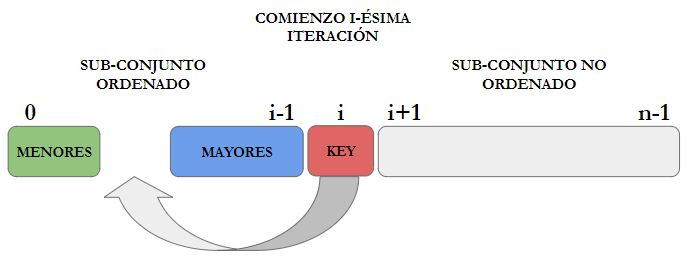

Al término de la $i-ésima$ iteración se seguirá cumpliendo la **propiedad del bucle invariante**.

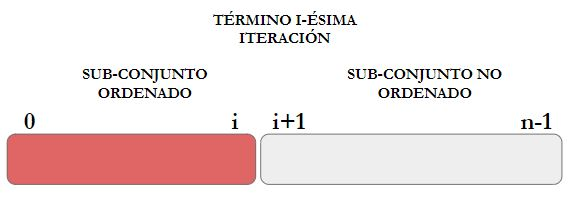

#### **Correctitud**
Como la propiedad resulta verdadera, en cada iteración $i$ se añade y ordena un nuevo elemento del $arreglo$ en este $sub-conjunto$, obteniendo al finalizar la iteración $i = n-1$ una permutación de todos los elementos del $arreglo$ en el $sub-conjunto$, ordenados de menor a mayor.

### **4.2. Teorema 2 (Correctitud de la función BucketSort)**

*El algoritmo **BucketSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

### **Prueba del Teorema**
Dado dos elementos del arreglo de entrada $A[i]$ y $A[j]$, considerando que $A[i] \leq A[j]$, $A[i]$ aparecerá antes que $A[j]$ en el arreglo de salida.

#### **Por inducción matemática**
>Probar el teorema para: $truncar(A[i]∗10) < truncar(A[j]∗10)$
>
>Probar el teorema para: $truncar(A[i]∗10) = truncar(A[j]∗10)$

#### Para $truncar(A[i]∗10) < truncar(A[j]∗10)$ (Distinto bucket)
En esta situación, según el bucle que organiza los elementos del arreglo original $A$, el elemento $A[i]$ será ingresado en un bucket anterior al que se ingresó $A[j]$ y por consiguiente aparecerá antes $A[i]$ que $A[j]$ en el arreglo de salida.

#### Para $truncar(A[i]∗10) = truncar(A[j]∗10)$ (Mismo bucket)
Lo que ocurrirá es que $A[i]$ y $A[j]$ se insertarán en el mismo bucket. Luego se ordenará el bucket usando el algoritmo InsertionSort, si $A[i]<A[j]$, entonces $A[i]$ quedará antes que $A[j]$ tanto en el bucket como en el arreglo de salida, si $A[i] = A[j]$, pero $i < j$, entonces el orden en que se introdujeron no cambiará por estabilidad del algoritmo y quedará en el arreglo de salida $A[i]$ antes que $A[j]$, probando así la correctitud. 


## **5. Experimentos**

#### **Implementación del CountingSort**

In [16]:
def countingSort(A, k):
  B = [0]*len(A)
  C = []
  for i in range(k+1):
    C.append(0)

  for j in range(0, len(A)):
    C[A[j]] += 1

  for i in range(1,k+1):
    C[i] += C[i-1]

  for j in range(len(A)-1, -1, -1):
    C[A[j]] -= 1
    B[C[A[j]]] = A[j]

  for j in range(len(A)):
    A[j] = B[j]


In [17]:
A = [13,11,65,30,7,18]
countingSort(A, max(A))
print(A)

[7, 11, 13, 18, 30, 65]


#### **Implementación del RadixSort**

In [10]:
def countingSort_Radix(arr, exp1):

	n = len(arr)
	output = [0] * (n)
	count = [0] * (10)

	for i in range(0, n):
		index = arr[i] // exp1
		count[index % 10] += 1

	for i in range(1, 10):
		count[i] += count[i - 1]
	i = n - 1

	while i >= 0:
		index = arr[i] // exp1
		output[count[index % 10] - 1] = arr[i]
		count[index % 10] -= 1
		i -= 1

	i = 0
	for i in range(0, len(arr)):
		arr[i] = output[i]

def radixSort(arr):

	max1 = max(arr)
	exp = 1
	while max1 / exp >= 1:
		countingSort_Radix(arr, exp)
		exp *= 10


In [13]:
A = [13,11,65,30,7,18]
radixSort(A)
print(A)

[7, 11, 13, 18, 30, 65]


### **5.1. Comparación de BucketSort frente a RadixSort, CountingSort e InsertionSort**


Dado que la implementación escogida de BucketSort solo ordena números entre 0.0 a 1.0 excluyéndolo, decimales que no pueden ser ordenados por CountingSort o RadixSort, se ecogió por tomar elementos aleatorios entre 0 y 99 para todos los algoritmos distintos al BucketSort, y para este último, considerar el mismo arreglo, pero modificando todos los elementos para que se encuentren dentro del rango, es decir, cada elemento se dividirá por 100.

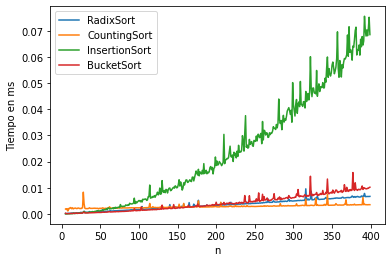

In [60]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_radix = []
y_counting = []
y_insertion = []
y_bucket = []

for n in range(5,400):

  r = random.sample(range(1, 1000), n)
  c = deepcopy(r)
  m = max(r)
  ins = deepcopy(r)
  b = deepcopy(r)
  for i in range(len(b)):
    b[i] = b[i] / 1000

  #la función repeat está ejecutando 20 veces radixSort con el arreglo r y retorna el mejor tiempo obtenido.
  t_radix = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({r})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces countingSort con el arreglo c y retorna el mejor tiempo obtenido.
  t_counting = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({c},{m})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces insertion_sort con el arreglo ins y retorna el mejor tiempo obtenido.
  t_insertion = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({ins})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort con el arreglo b y retorna el mejor tiempo obtenido.
  t_bucket = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({b})", repeat=1, number=10)

  x.append(n)
  y_radix.append(t_radix)
  y_counting.append(t_counting)
  y_insertion.append(t_insertion)
  y_bucket.append(t_bucket)

plt.plot(x,y_radix)
plt.plot(x,y_counting)
plt.plot(x,y_insertion)
plt.plot(x,y_bucket)
plt.legend(["RadixSort","CountingSort","InsertionSort","BucketSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de los resultados**
Como se puede observar en la gráfica, es correcto afirmar que en los casos promedios la complejidad del los algoritmos RadixSort, CountingSort y BucketSort tienen complejidad lineal, comparados con uno de complejidad cuadrática como lo es InsertionSort. Pero además de eso, podemos ver que el más eficiente es el CountingSort, esto puede deberse a que con anterioridad es calculado el **max(arreglo de entrada)** lo que resta tener que recorrer para encontrar el máximo elemento. Como hipótesis puede que el BucketSort no sea tan eficiente como el CountingSort o el RadixSort debido a que tiene muy poca cantidad de buckets, esto se comprobará en el próximo experimento.

#### Implementación de un BucketSort con 100 buckets

In [52]:
def bucketSort100(A):
    bucket = []
    cant_buckets = 100 
        
    #Ciclo que crea cada bucket
    for i in range(cant_buckets):
        bucket.append([])

    #Ciclo que clasifica cada número para introducirse a su bucket correspondiente
    for j in A:
        index_b = int(cant_buckets * j) #Ejemplo j = 0.55, se multiplica por 100 y se trunca,
        bucket[index_b].append(j)   #entonces se introduce en el bucket de índice 55

    for i in range(cant_buckets):
      #Ordena cada bucket por separado con la función InsertionSort
      bucket[i], cont = insertionSort(bucket[i])

    #Reemplaza cada elemento del arreglo original por los buckets ordenados por rangos de menor a mayor       
    k = 0
    for i in range(cant_buckets):
        for j in range(len(bucket[i])):
            A[k] = bucket[i][j]
            k += 1

    return A

In [53]:
A = [0.647 , 0.854 , 0.256 , 0.071 , 0.133 , 0.888 , 0.544 , 0.619 , 0.845 , 0.79] 
A = bucketSort100(A)
print("Arreglo final ordenado:", A)

Arreglo final ordenado: [0.071, 0.133, 0.256, 0.544, 0.619, 0.647, 0.79, 0.845, 0.854, 0.888]


### **5.2. Comparación de BucketSort con 10 buckets frente a uno con 100**
Realizamos una modificación a BucketSort, para realizar 100 buckets con intérvalos de una centésima cada uno.

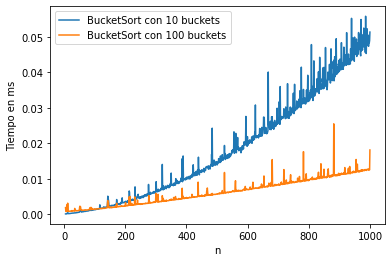

In [62]:
x=[]
y_bucket = []
y_bucket100 = []

for n in range(5,1000):

  b = random.sample(range(1, 1000), n)
  for i in range(len(b)):
    b[i] = b[i] / 1000
  b100 = deepcopy(b)

  
  #la función repeat está ejecutando 20 veces bucketSort con el arreglo b y retorna el mejor tiempo obtenido.
  t_bucket = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({b})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort100 con el arreglo b100 y retorna el mejor tiempo obtenido.
  t_bucket100 = repeat(setup="from __main__ import bucketSort100", stmt=f"bucketSort100({b100})", repeat=1, number=10)

  x.append(n)
  y_bucket.append(t_bucket)
  y_bucket100.append(t_bucket100)

plt.plot(x,y_bucket)
plt.plot(x,y_bucket100)
plt.legend(["BucketSort con 10 buckets","BucketSort con 100 buckets"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

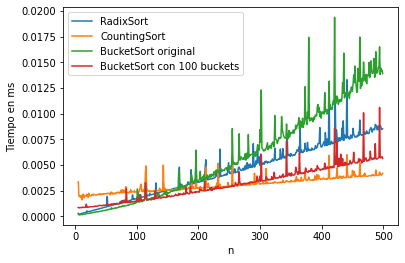

In [64]:
x=[]
y_radix = []
y_counting = []
y_bucket = []
y_bucket100 = []

for n in range(5,500):

  r = random.sample(range(1, 1000), n)
  c = deepcopy(r)
  m = max(r)
  b = deepcopy(r)
  for i in range(len(b)):
    b[i] = b[i] / 1000
  b100 = deepcopy(b)

  #la función repeat está ejecutando 20 veces radixSort con el arreglo r y retorna el mejor tiempo obtenido.
  t_radix = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({r})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces countingSort con el arreglo c y retorna el mejor tiempo obtenido.
  t_counting = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({c},{m})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort con el arreglo b y retorna el mejor tiempo obtenido.
  t_bucket = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({b})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces bucketSort100 con el arreglo b100 y retorna el mejor tiempo obtenido.
  t_bucket100 = repeat(setup="from __main__ import bucketSort100", stmt=f"bucketSort100({b100})", repeat=1, number=10)

  x.append(n)
  y_radix.append(t_radix)
  y_counting.append(t_counting)
  y_bucket.append(t_bucket)
  y_bucket100.append(t_bucket100)

plt.plot(x,y_radix)
plt.plot(x,y_counting)
plt.plot(x,y_bucket)
plt.plot(x,y_bucket100)
plt.legend(["RadixSort","CountingSort","BucketSort original","BucketSort con 100 buckets"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de los resultados**
Como podemos ver, aumentar la cantidad de buckets cuando hay también una gran cantidad de elementos si funciona para aumentar su eficiencia, ya que BucketSort superaba a su variante hasta que la cantidad de elementos superó a los 100 aproximadamente, ya que desde ese momento fué más útil particionar por 100 intérvalos puesto que la cantidad total de elementos se distribuirá de forma que sean menos por cada bucket en comparación con la versión original. También puede observarse que sin importar cuantas modificaciones a ***fuerza bruta*** realizemos a BucketSort, hay una clara tendencia de que CountingSort lo superará, siendo el más eficiente. Pero puede que alguna modificación que relacione a la **cantidad de buckets** con la **cantidad de elementos** sea la solución, ya que hasta los 250 elementos aproximadamente, *BucketSort100* superó a CountingSort.

#### **Peaks de ejecución**
Sobre los peaks en todos los gráficos se deben a procesos externos del entorno de ejecución, no a anomalías en los algoritmos, como se puede observar en anteriores informes realizados.